In [1]:
# Import Data Modules, Plotting Modules, and Stats/Regressions Packages
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn import decomposition
from sklearn.decomposition import PCA
from matplotlib.mlab import PCA
from scipy.misc import lena
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline
%config InlineBackend.figure_format ='retina'

/home/dsi-student/Downloads/conda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Upload the Date Set
df = pd.read_csv('/home/dsi-student/Desktop/ECON628-01-RPanlilio/refugeedata2.csv')

In [4]:
# Head of Data Set
df.head()

,age,sex,goo,doo,soo,doa,famsize,bro,sis,sib,...,_demeanptsd1_nm,_id,_n1,_nn,_pdif,psetc,b1etc,psrei,b1rei,comsup
0,12,male,Syria,NaN,NaN,2013,7,3.0,2.0,NaN,...,NaN,234,NaN,0.0,NaN,0.627690,4.0,0.430279,3.0,1
1,12,male,NaN,NaN,NaN,2013,7,NaN,NaN,NaN,...,NaN,48,NaN,0.0,NaN,0.296827,2.0,0.539266,4.0,1
2,12,female,NaN,NaN,NaN,2012,10,3.0,4.0,7.0,...,NaN,224,NaN,0.0,NaN,0.606842,4.0,0.248817,2.0,1
3,5,female,NaN,NaN,NaN,2013,5,1.0,2.0,NaN,...,NaN,296,NaN,0.0,NaN,0.892124,5.0,0.441027,3.0,1
4,9,female,Syria,NaN,NaN,2013,7,NaN,5.0,NaN,...,NaN,161,NaN,0.0,NaN,0.471024,3.0,0.478241,3.0,1


In [5]:
# Tail of Data Set
df.tail()

,age,sex,goo,doo,soo,doa,famsize,bro,sis,sib,...,_demeanptsd1_nm,_id,_n1,_nn,_pdif,psetc,b1etc,psrei,b1rei,comsup
1226,7,female,Daraa,NaN,NaN,2012,8,1.0,5.0,NaN,...,-0.287096,575,279.0,1.0,0.001656,0.775553,4.0,0.319793,2.0,1
1227,7,female,Daraa,NaN,NaN,2013,15,NaN,NaN,NaN,...,-0.287096,303,10.0,1.0,0.000075,0.105534,1.0,0.402993,3.0,1
1228,8,female,Daraa,As-Sanamayn,As-Sanamayn,2013,6,2.0,2.0,NaN,...,NaN,1231,NaN,NaN,NaN,NaN,NaN,0.133858,1.0,1
1229,9,male,Damascus,NaN,NaN,2014,7,NaN,NaN,NaN,...,-0.287096,462,236.0,1.0,0.002051,0.645564,4.0,0.531874,4.0,1
1230,6,female,Daraa,NaN,NaN,2013,6,1.0,2.0,NaN,...,-0.248914,654,291.0,1.0,0.000000,0.852473,5.0,0.417184,3.0,1


In [6]:
# Description of Data Set
df.describe()

,age,doa,famsize,bro,sis,sib,ref,rei,res,gov,...,_demeanptsd1_nm,_id,_n1,_nn,_pdif,psetc,b1etc,psrei,b1rei,comsup
count,1231.000000,1231.000000,1231.000000,949.000000,942.000000,154.000000,1231.000000,1231.000000,1231.0,0.0,...,834.000000,1231.000000,834.000000,1136.000000,834.000000,1136.000000,1127.000000,1231.000000,1229.000000,1231.000000
mean,8.763607,2012.989439,6.981316,2.582719,2.495754,4.603896,0.574330,0.425670,0.0,NaN,...,-0.334816,616.000000,265.035971,0.734155,0.002857,0.734528,4.437445,0.426137,2.895850,0.998375
std,1.992304,0.646983,1.908596,1.484362,1.480831,1.981677,0.494645,0.494645,0.0,NaN,...,0.578024,355.503399,64.847581,0.441977,0.003995,0.260384,1.523452,0.115255,0.968842,0.040291
min,5.000000,2010.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,...,-0.799984,1.000000,10.000000,0.000000,0.000000,0.063346,1.000000,0.068477,1.000000,0.000000
25%,7.000000,2013.000000,6.000000,2.000000,1.000000,3.000000,0.000000,0.000000,0.0,NaN,...,-0.799984,308.500000,260.250000,0.000000,0.000206,0.512706,3.000000,0.359398,2.000000,1.000000
50%,9.000000,2013.000000,7.000000,2.000000,2.000000,4.000000,1.000000,0.000000,0.0,NaN,...,-0.287096,616.000000,298.000000,1.000000,0.001044,0.794303,4.000000,0.438719,3.000000,1.000000
75%,10.000000,2013.000000,8.000000,3.000000,3.000000,6.000000,1.000000,1.000000,0.0,NaN,...,-0.161286,923.500000,301.000000,1.000000,0.003793,0.992569,6.000000,0.503733,4.000000,1.000000
max,12.000000,2016.000000,16.000000,13.000000,8.000000,12.000000,1.000000,1.000000,0.0,NaN,...,2.854961,1231.000000,302.000000,1.000000,0.024843,0.999989,6.000000,0.734952,5.000000,1.000000


In [7]:
# Data Types of Data Set
df.dtypes

age                        int64
sex                       object
goo                       object
doo                       object
soo                       object
doa                        int64
famsize                    int64
bro                      float64
sis                      float64
sib                      float64
po                        object
ind                       object
ref                        int64
rei                        int64
res                        int64
dis                       object
gov                      float64
cit                       object
hfd                      float64
ffd                      float64
ad1                      float64
ad2                      float64
ad3                      float64
ad4                      float64
ad5                      float64
adp                      float64
a1                         int64
a2                         int64
a3                       float64
d1                       float64
          

In [8]:
# Info of Data Set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Columns: 145 entries, age to comsup
dtypes: float64(103), int64(31), object(11)
memory usage: 1.4+ MB


In [9]:
# Correlation of Data Set
df.corr()

,age,doa,famsize,bro,sis,sib,ref,rei,res,gov,...,_demeanptsd1_nm,_id,_n1,_nn,_pdif,psetc,b1etc,psrei,b1rei,comsup
age,1.000000,-0.138177,0.173947,0.149712,0.115062,0.327737,0.058681,-0.058681,NaN,NaN,...,0.093183,-0.138758,-0.114608,-0.092536,-0.012840,-0.158155,-0.158881,-0.251929,-0.295305,0.005340
doa,-0.138177,1.000000,0.011691,0.040146,0.036446,0.113242,-0.082650,0.082650,NaN,NaN,...,-0.098695,0.107138,0.053069,0.046836,-0.026902,0.067367,0.091419,0.350396,0.347716,-0.125412
famsize,0.173947,0.011691,1.000000,0.548113,0.583901,0.941214,0.032905,-0.032905,NaN,NaN,...,0.011479,-0.284514,-0.233918,-0.198414,0.036929,-0.333304,-0.276285,-0.140410,-0.150702,0.010177
bro,0.149712,0.040146,0.548113,1.000000,-0.083443,0.642661,0.003482,-0.003482,NaN,NaN,...,0.025694,-0.171905,-0.154310,-0.159485,0.087690,-0.231518,-0.199441,-0.004143,-0.007933,0.002562
sis,0.115062,0.036446,0.583901,-0.083443,1.000000,0.763225,0.125618,-0.125618,NaN,NaN,...,0.003610,-0.121538,-0.080212,-0.053124,-0.000402,-0.104476,-0.078058,-0.135115,-0.159085,-0.011106
sib,0.327737,0.113242,0.941214,0.642661,0.763225,1.000000,0.467750,-0.467750,NaN,NaN,...,-0.016745,-0.525930,-0.334969,-0.533307,-0.201165,-0.611889,-0.605029,-0.094441,-0.036816,-0.016212
ref,0.058681,-0.082650,0.032905,0.003482,0.125618,0.467750,1.000000,-1.000000,NaN,NaN,...,0.006900,0.125261,0.016794,0.125126,0.041467,0.073686,0.081914,-0.240057,-0.257507,-0.034729
rei,-0.058681,0.082650,-0.032905,-0.003482,-0.125618,-0.467750,-1.000000,1.000000,NaN,NaN,...,-0.006900,-0.125261,-0.016794,-0.125126,-0.041467,-0.073686,-0.081914,0.240057,0.257507,0.034729
res,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gov,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


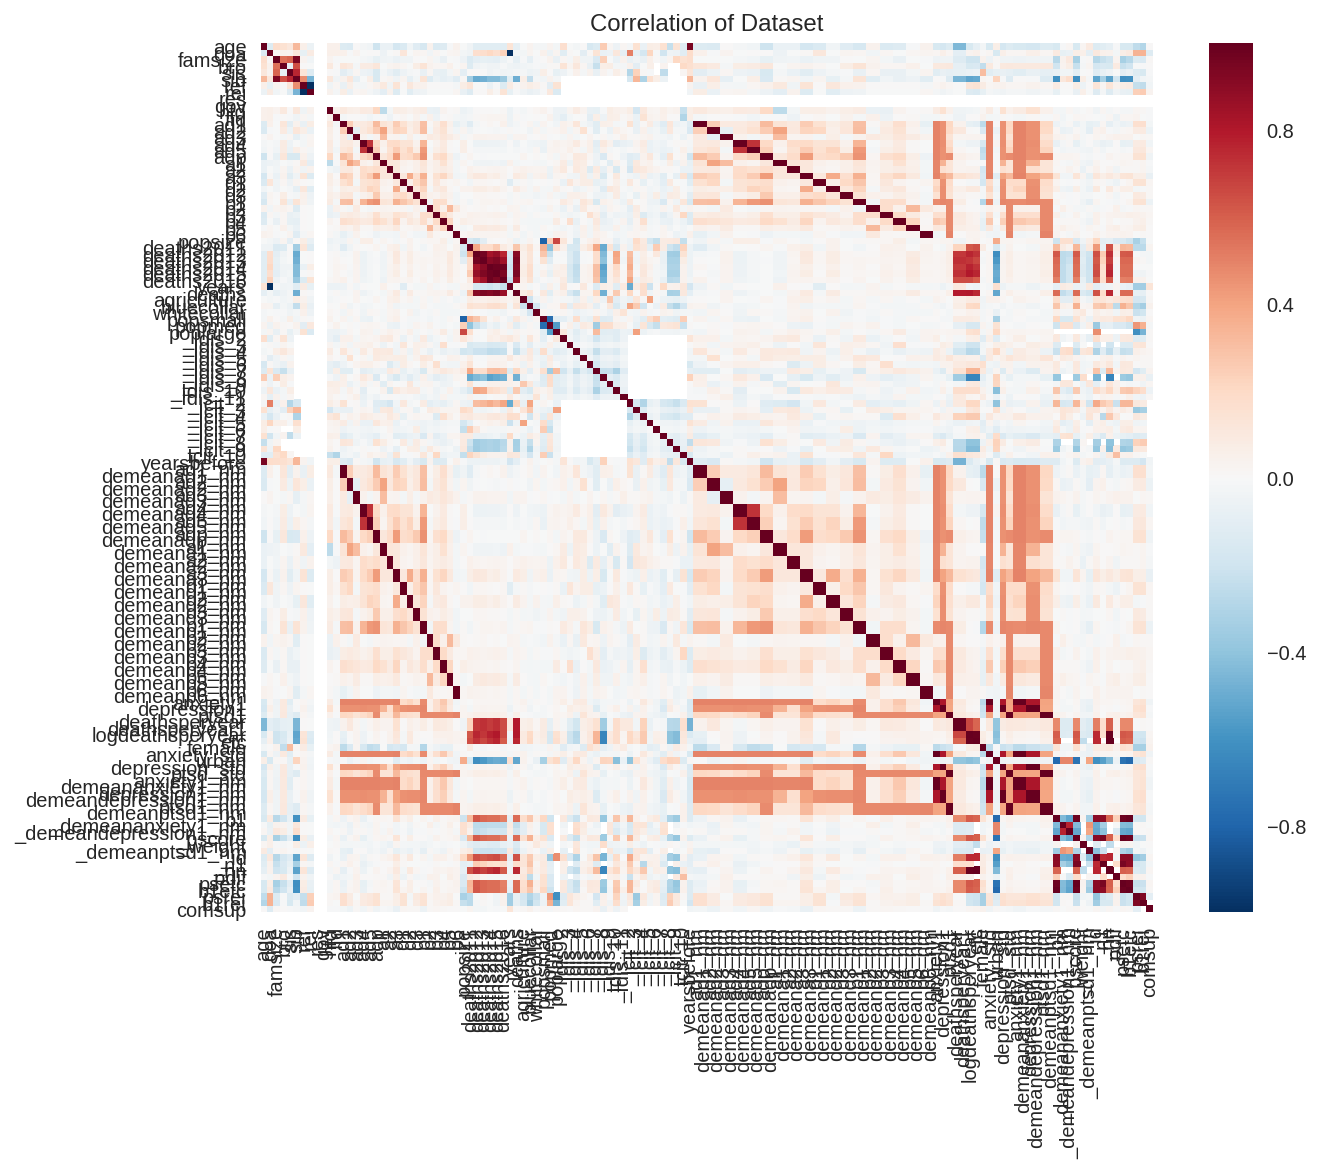

In [10]:
# Correlation Heat Map of Dataset
df.corr()
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
ax.set_title('Correlation of Dataset')
sns.heatmap(df.corr(), ax=ax)
plt.show()

In [11]:
# Checking for Null/Missing Values
df.isnull().sum(axis=0)

age                         0
sex                         0
goo                       197
doo                       898
soo                       845
doa                         0
famsize                     0
bro                       282
sis                       289
sib                      1077
po                        281
ind                         0
ref                         0
rei                         0
res                         0
dis                       524
gov                      1231
cit                       826
hfd                         1
ffd                         1
ad1                         5
ad2                         5
ad3                         5
ad4                         7
ad5                         5
adp                         5
a1                          0
a2                          0
a3                          5
d1                          5
                         ... 
logdeathsperyear            0
etc                         0
female    

In [12]:
# Data Cleaning
# Replacing Null with Mean
df.ad1 = df.ad1.fillna(np.mean(df.ad1))
df.ad2 = df.ad2.fillna(np.mean(df.ad2))
df.ad3 = df.ad3.fillna(np.mean(df.ad3))
df.ad4 = df.ad4.fillna(np.mean(df.ad4))
df.ad5 = df.ad5.fillna(np.mean(df.ad5))
df.adp = df.adp.fillna(np.mean(df.adp))
df.a1 = df.a1.fillna(np.mean(df.a1))
df.a2 = df.a2.fillna(np.mean(df.a2))
df.a3 = df.a3.fillna(np.mean(df.a3))
df.d1 = df.d1.fillna(np.mean(df.d1))
df.d2 = df.d2.fillna(np.mean(df.d2))
df.d3 = df.d3.fillna(np.mean(df.d3))
df.p1 = df.p1.fillna(np.mean(df.p1))
df.p2 = df.p2.fillna(np.mean(df.p2))
df.p3 = df.p3.fillna(np.mean(df.p3))
df.p4 = df.p4.fillna(np.mean(df.p4))
df.p5 = df.p5.fillna(np.mean(df.p5))
df.p6 = df.p6.fillna(np.mean(df.p6))

In [13]:
# Normalizing Psychological Indicators
df_indicators = df[['ad1', 'ad2', 'ad3', 'ad4', 'ad5', 'adp', 'a1', 'a2', 'a3', 'd1', 'd2', 'd3', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6']]
df_norm = (df_indicators - df_indicators.mean()) / df_indicators.std()

# Grouping Psychological Indicators into Anxiety, Depression, and PTSD
df_anxiety = df_norm[['ad1', 'ad2', 'ad3', 'ad4', 'ad5', 'adp', 'a1', 'a2', 'a3']]
df_depression = df_norm[['ad1', 'ad2', 'ad3', 'ad4', 'ad5', 'adp', 'd1', 'd2', 'd3']]
df_ptsd = df_norm[['adp', 'p1', 'p2', 'p3', 'p4', 'p5', 'p6']]

# Performing PCA to reduce dimensionality
pca = decomposition.PCA()
pca.n_components = 1
anxiety = pca.fit_transform(df_anxiety)
depression = pca.fit_transform(df_depression)
ptsd = pca.fit_transform(df_ptsd)

# Grouping Psychological Indicators with Reduced Dimensionality
anx = pd.DataFrame(anxiety)
dep = pd.DataFrame(depression)
ptsd = pd.DataFrame(ptsd) 
df_run = pd.concat([df.ref, anx, dep, ptsd], axis=1, join='inner')
df_run.columns = ['Refugee', 'Anxiety', 'Depression', 'PTSD']

In [14]:
df['Anxiety'] = df_run.Anxiety
df['Depression'] = df_run.Depression
df['PTSD'] = df_run.PTSD

In [15]:
# Data Cleaning
df.loc[df.sex == 'male', 'sex'] = 0
df.loc[df.sex == 'female', 'sex'] = 1
df['years'] = 2016 - df.doa

# Set y and x Variables

In [31]:
y = df.Anxiety.values
col = ['age', 'sex', 'famsize', 'urban', 'popmed', 'poplarge', 'agriculture', 'bluecollar', 'whitecollar', 'rei', 'etc']
x = df[[i for i in col]]
print y.shape, x.shape

(1231,) (1231, 11)


In [32]:
# Standardizing the Data
ss = StandardScaler() 
xn = ss.fit_transform(x)
xn.shape

# Creating Train and Test DataSets
x_train, x_test, y_train, y_test = train_test_split(xn, y, test_size=0.3, random_state=10)
print 'Shape of X_train is: ', x_train.shape
print 'Shape of y_train is: ', y_train.shape 
print "\n======\n"
print 'Shape of X_test is: ', x_test.shape
print 'Shape of y_test is: ', y_test.shape

Shape of X_train is:  (861, 11)
Shape of y_train is:  (861,)


Shape of X_test is:  (370, 11)
Shape of y_test is:  (370,)


# Linear Regression

In [45]:
# Linear Regression
lm = LinearRegression()

# Fitting the model
model = lm.fit(x_train, y_train)

# Cross validate 10 times the linear regression scores 
linreg_scores = cross_val_score(lm, x_train, y_train, cv=10)

# Print the R^2
print 'Cross validated R^2 OLS scores:', linreg_scores
print '\n====\n'
print "Average Cross validated R^2 OLS score: %.3f" % (np.mean(linreg_scores))

Cross validated R^2 OLS scores: [ 0.24958108  0.1953611   0.13852303  0.07189108  0.06730998  0.18560685
  0.13648426  0.10868603  0.18621376  0.17315148]

====

Average Cross validated R^2 OLS score: 0.151


In [54]:
# Create linear regression object
linear = linear_model.LinearRegression()
# Train the model using the training sets and check score
print linear.fit(x_train, y_train)
print linear.score(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
0.180423088886


In [56]:
#Equation coefficient and Intercept
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
#Predict Output
predicted = linear.predict(x_test)

('Coefficient: \n', array([-0.31522583, -0.58463775, -0.03998292, -0.10213435,  0.0978842 ,
        0.10083434,  0.00847508, -0.06736765, -0.03041   , -0.18893506,
       -0.03067103]))
('Intercept: \n', 0.044206745250279671)


# Logistic Regression

In [57]:
#Import Library
from sklearn.linear_model import LogisticRegression

In [66]:
# Logistic Regression
lr = LogisticRegression()

# Fitting the model
model = lr.fit(x_train, y_train)

# Cross validate 10 times the linear regression scores 
logreg_scores = cross_val_score(lr, x_train, y_train, cv=10)

# Print the R^2
print 'Cross validated R^2 OLS scores:', linreg_scores
print '\n====\n'
print "Average Cross validated R^2 OLS score: %.3f" % (np.mean(linreg_scores))

ValueError: Unknown label type: 'continuous'

In [ ]:
# Train the model using the training sets and check score
print lr.fit(x_train, y_train)
print lr.score(x_train, y_train)

In [64]:
#Equation coefficient and Intercept
print('Coefficient: \n', lr.coef_)
print('Intercept: \n', lr.intercept_)
#Predict Output
predicted= lr.predict(x_test)

AttributeError: 'LogisticRegression' object has no attribute 'coef_'

In [62]:
# Logistic Regression doesn't work for continuous variables

# Decision Tree

In [67]:
from sklearn import tree

In [68]:
# Fitting the model
model = tree.DecisionTreeRegressor()

In [70]:
print model.fit(x_train, y_train)
print model.score(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')
0.794178173119


In [74]:
#Predict Output
predicted = model.predict(x_test)

# Support Vector Regression

In [76]:
#Import Library
from sklearn import svm
from sklearn.svm import SVC

In [79]:
clf = svm.SVR()
clf.fit(x, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [97]:
clf.predict(x_test)

array([-0.16328627, -0.15866637, -0.19968887, -0.16328627, -0.19374673,
       -0.1700384 , -0.20019561, -0.19913774, -0.19136668, -0.20220002,
       -0.19978257, -0.17673884, -0.19026759, -0.19966743, -0.19954583,
       -0.18704828, -0.20058829, -0.20100638, -0.20262208, -0.19223013,
       -0.20007215, -0.19550856, -0.19662816, -0.19801553, -0.20243588,
       -0.1954725 , -0.19913774, -0.19742953, -0.19916762, -0.19609933,
       -0.20091867, -0.18112876, -0.20334965, -0.13366527, -0.19843633,
       -0.19637014, -0.13708876, -0.19484895, -0.17560833, -0.18604444,
       -0.19682363, -0.19484895, -0.19951357, -0.1924225 , -0.19865547,
       -0.20223997, -0.20009655, -0.19641551, -0.19961655, -0.19870069,
       -0.20064096, -0.19123745, -0.18522529, -0.20027726, -0.18921514,
       -0.19767901, -0.18345012, -0.19991594, -0.19583101, -0.19528541,
       -0.15030884, -0.19864035, -0.2010851 , -0.19567361, -0.20063167,
       -0.20034559, -0.18682856, -0.20310063, -0.20058936, -0.20

# Naive Bayes

In [98]:
#Import Library
from sklearn.naive_bayes import GaussianNB
model = GaussianNB() 
# Train the model using the training sets and check score
model.fit(x_train, y_train)
#Predict Output
predicted= model.predict(x_test)

ValueError: Unknown label type: (array([-2.06625356, -2.06625356, -2.06625356, -1.56991295, -1.56991295,
       -1.3936054 , -1.3936054 , -1.28987682, -1.26825088, -1.2316666 ,
       -1.14155943, -1.00931604, -0.89726479, -0.89726479, -0.89726479,
       -0.73532599, -0.72579876, -0.61722866, -0.59560272, -0.55901844,
       -0.46891127, -0.45528987, -0.43366392, -0.34355675, -0.33666788,
       -0.30697247, -0.28900319, -0.23293931, -0.17472908, -0.12088806,
       -0.06267783,  0.02742934,  0.04105074,  0.18077402,  0.2173583 ,
        0.23363889,  0.23898424,  0.32161152,  0.34271281,  0.36567569,
        0.39557768,  0.40218944,  0.43970886,  0.46940426,  0.48737355,
        0.48737355,  0.49791908,  0.54558377,  0.7136989 ,  0.76793433,
        0.80380607,  0.8620163 ,  0.93604946,  0.98371415,  0.99425969,
        1.01001562,  1.01536097,  1.06822585,  1.08436686,  1.14205242,
        1.15833302,  1.16367837,  1.17195442,  1.26427494,  1.27429581,
        1.32027181,  1.3219605 ,  1.34358645,  1.34826197,  1.36440298,
        1.39430498,  1.42261321,  1.4437145 ,  1.52634178,  1.54431106,
        1.56593701,  1.60252129,  1.62362258,  1.63839303,  1.69262846,
        1.77063642,  1.81830111,  1.84460258,  1.91895381,  1.9400551 ,
        1.99291997,  2.04065167,  2.09886189,  2.11461783,  2.12516336,
        2.19898994,  2.24665463,  2.37889802,  2.39517861,  2.40052397,
        2.52721541,  2.69533055,  2.74299524,  2.76929671,  2.87523863,
        2.9015401 ,  2.94920479,  3.02355602,  3.04465731,  3.04985749,
        3.1769007 ,  3.22976557,  3.30359215,  3.32521809,  3.60525422,
        3.79993275,  3.82623423,  3.87389892,  4.0061423 ,  4.10159483,
        4.1544597 ,  4.93083643]),)

# KNN

In [99]:
from sklearn.neighbors import KNeighborsRegressor

In [100]:
# Create KNN Model
knn = KNeighborsRegressor(n_neighbors=5)

In [103]:
# Fit the model on the training data
knn.fit(x_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [104]:
# Make the point predictions on the test set using the fit model
predictions = knn.predict(x_test)

In [110]:
# Get the actual values for the test set.
actual = y_test
# Compute the mean squared error of our predictions.
mse = (((predictions - actual) ** 2).sum()) / len(predictions)
print mse

2.25190765114


In [121]:
knn.score(x, y)

-0.16551037454200723

# K Means

In [111]:
#Import Library
from sklearn.cluster import KMeans

In [112]:
# Create KNeighbors classifier object model 
k_means = KMeans(n_clusters=3, random_state=0)

In [115]:
# Fitting the model
model = k_means.fit(x_train, y_train)

In [117]:
#Predict Output
predicted= model.predict(x_test)

In [119]:
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 2, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 0, 0, 2,
       2, 1, 0, 2, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0,